In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Install libraries

In [2]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 346 kB 26.3 MB/s 
     |████████████████████████████████| 86 kB 4.3 MB/s 
     |████████████████████████████████| 212 kB 36.1 MB/s 
     |████████████████████████████████| 1.1 MB 37.9 MB/s 
     |████████████████████████████████| 86 kB 2.6 MB/s 
     |████████████████████████████████| 140 kB 47.3 MB/s 
     |████████████████████████████████| 596 kB 22.3 MB/s 
     |████████████████████████████████| 127 kB 11.3 MB/s 
     |████████████████████████████████| 144 kB 43.5 MB/s 
     |████████████████████████████████| 94 kB 2.6 MB/s 
     |████████████████████████████████| 271 kB 43.0 MB/s 
     |████████████████████████████████| 112 kB 26.1 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: pyyaml
    Found existing in

#Download XNLI dataset

In [3]:
from datasets import load_dataset
import pandas as pd
from tqdm.auto import tqdm
import os

In [4]:
vi_dataset = load_dataset("xnli",language='vi')
en_dataset = load_dataset("xnli",language='en')

Using custom data configuration default-language=vi


Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset xnli downloaded and prepared to /root/.cache/huggingface/datasets/xnli/default-language=vi/1.1.0/818164464f9c9fd15776ca8a00423b074344c3e929d00a2c1a84aa5a50c928bd. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

Using custom data configuration default-language=en


Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset xnli downloaded and prepared to /root/.cache/huggingface/datasets/xnli/default-language=en/1.1.0/818164464f9c9fd15776ca8a00423b074344c3e929d00a2c1a84aa5a50c928bd. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [5]:
vi_dataset

DatasetDict({
    train: Dataset({
        features: ['premise', 'hypothesis', 'label'],
        num_rows: 392702
    })
    test: Dataset({
        features: ['premise', 'hypothesis', 'label'],
        num_rows: 5010
    })
    validation: Dataset({
        features: ['premise', 'hypothesis', 'label'],
        num_rows: 2490
    })
})

In [6]:
en_dataset

DatasetDict({
    train: Dataset({
        features: ['premise', 'hypothesis', 'label'],
        num_rows: 392702
    })
    test: Dataset({
        features: ['premise', 'hypothesis', 'label'],
        num_rows: 5010
    })
    validation: Dataset({
        features: ['premise', 'hypothesis', 'label'],
        num_rows: 2490
    })
})

In [7]:
vi_train=pd.DataFrame(vi_dataset['train'])
vi_valid=pd.DataFrame(vi_dataset['validation'])
vi_test=pd.DataFrame(vi_dataset['test'])

In [8]:
en_train=pd.DataFrame(en_dataset['train'])
en_valid=pd.DataFrame(en_dataset['validation'])
en_test=pd.DataFrame(en_dataset['test'])

Concatenate two datasets



In [9]:
def merge_en_vi_pairs(en,vi):
  # en set, vi set set must have the same size

  en_premises=en['premise']
  en_hypothesises=en['hypothesis']
  en_labels=en['label']

  vi_premises=vi['premise']
  vi_hypothesises=vi['hypothesis']
  vi_labels=vi['label']

  pairs=[]
  num_samples=len(en)
  bar=tqdm(range(num_samples))

  for i in range(num_samples):
    if en_labels[i]==vi_labels[i]:
      pairs.append({
          'en_premise':en_premises[i],
          'vi_premise':vi_premises[i],
          'en_hypothesis':en_hypothesises[i],
          'vi_hypothesis':vi_hypothesises[i],
          'label':en_labels[i],
      })
    bar.update()
  
  return pd.DataFrame(pairs)

In [10]:
train=merge_en_vi_pairs(en_train,vi_train)
valid=merge_en_vi_pairs(en_valid,vi_valid)
test=merge_en_vi_pairs(en_test,vi_test)

  0%|          | 0/392702 [00:00<?, ?it/s]

  0%|          | 0/2490 [00:00<?, ?it/s]

  0%|          | 0/5010 [00:00<?, ?it/s]

In [11]:
raw_dataset_directory='/content/drive/MyDrive/en-vi-nli/raw_dataset'
os.makedirs(raw_dataset_directory,exist_ok=True)

In [12]:
train.to_csv(f'{raw_dataset_directory}/train.csv',index=False)
valid.to_csv(f'{raw_dataset_directory}/valid.csv',index=False)
test.to_csv(f'{raw_dataset_directory}/test.csv',index=False)

#Create cross linguistic sentences pairs dataset

In [13]:
import pandas as pd

In [14]:
raw_dataset_directory='/content/drive/MyDrive/en-vi-nli/raw_dataset'

In [15]:
train=pd.read_csv(f'{raw_dataset_directory}/train.csv')
valid=pd.read_csv(f'{raw_dataset_directory}/valid.csv')
test=pd.read_csv(f'{raw_dataset_directory}/test.csv')

In [16]:
train.value_counts(['label'])

label
2        130903
1        130900
0        130899
dtype: int64

In [17]:
valid.value_counts(['label'])


label
0        830
1        830
2        830
dtype: int64

In [18]:
test.value_counts(['label'])


label
0        1670
1        1670
2        1670
dtype: int64

suppose to generate dataset with the following column

- premise_language
- hypothesis_language
- premise_sentence
- hypothesis_sentence
- label

So, the final dataset will contains

- en-vi pairs
- vi-en pairs (not yet)
- en-en pairs (not yet)
- vi-vi pairs

In [19]:
pairs_type=[
  ['en','vi'],['vi','vi']
]

In [20]:
def create_sentences_pairs_dataset(df):
  pairs=[]
  for idx,i in enumerate(pairs_type):
    
    premise_language=f'{i[0]}_premise'
    hypothesis_language=f'{i[1]}_hypothesis'
    print(premise_language,hypothesis_language)

    pair=df[[premise_language,hypothesis_language,'label']]
    pair['premise_language']=[i[0]]*len(df)
    pair['hypothesis_language']=[i[1]]*len(df)
    pair.rename(columns={premise_language:'premise',hypothesis_language:'hypothesis'},inplace=True)  
    pairs.append(pair)
  return pairs

In [21]:
pairs=create_sentences_pairs_dataset(train)

en_premise vi_hypothesis
vi_premise vi_hypothesis


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [22]:
pairs_dataset_directory='/content/drive/MyDrive/en-vi-nli/pairs_dataset'
os.makedirs(pairs_dataset_directory,exist_ok=True)

In [23]:
def save_pairs_dataset(pairs,pairs_dataset_directory,data_type='train'):
  data_type_directory=f'/content/drive/MyDrive/en-vi-nli/pairs_dataset/{data_type}'
  os.makedirs(data_type_directory,exist_ok=True)
  for idx,pair in enumerate(pairs):
    pair.to_csv(f'{data_type_directory}/{pairs_type[idx][0]}_{pairs_type[idx][1]}.csv',index=False)

In [24]:
save_pairs_dataset(pairs,pairs_dataset_directory,data_type='train')


In [25]:
valid_pairs=create_sentences_pairs_dataset(valid)
test_pairs=create_sentences_pairs_dataset(test)

en_premise vi_hypothesis
vi_premise vi_hypothesis
en_premise vi_hypothesis
vi_premise vi_hypothesis


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [26]:
save_pairs_dataset(valid_pairs,pairs_dataset_directory,data_type='valid')
save_pairs_dataset(test_pairs,pairs_dataset_directory,data_type='test')

#Preprocessing

In [30]:
import pandas as pd
from normalizer import normalizer
import matplotlib.pyplot as plt

In [31]:
pairs_dataset_directory='/content/drive/MyDrive/en-vi-nli/pairs_dataset'


In [32]:
en_vi_train=pd.read_csv(f'{pairs_dataset_directory}/train/en_vi.csv')
vi_vi_train=pd.read_csv(f'{pairs_dataset_directory}/train/vi_vi.csv')

In [33]:
en_vi_valid=pd.read_csv(f'{pairs_dataset_directory}/valid/en_vi.csv')
vi_vi_valid=pd.read_csv(f'{pairs_dataset_directory}/valid/vi_vi.csv')

In [35]:
def multiple_normalizer(df):
  num_samples=len(df)
  premises=[]
  hypothesises=[]
  bar=tqdm(range(num_samples))
  for i in range(num_samples):
    row=df.iloc[i]
    norm_premise=normalizer(row['premise'],row['premise_language'])
    norm_hypothesis=normalizer(row['hypothesis'],row['hypothesis_language'])
    premises.append(norm_premise)
    hypothesises.append(norm_hypothesis)
    bar.update()
  return premises,hypothesises

In [36]:
premsises,hypothesises=multiple_normalizer(en_vi_train)
en_vi_train['norm_premise']=premsises
en_vi_train['norm_hypothesis']=hypothesises

  0%|          | 0/392702 [00:00<?, ?it/s]

In [37]:
premsises,hypothesises=multiple_normalizer(en_vi_valid)
en_vi_valid['norm_premise']=premsises
en_vi_valid['norm_hypothesis']=hypothesises

  0%|          | 0/2490 [00:00<?, ?it/s]

In [39]:
premsises,hypothesises=multiple_normalizer(vi_vi_train)
vi_vi_train['norm_premise']=premsises
vi_vi_train['norm_hypothesis']=hypothesises

  0%|          | 0/392702 [00:00<?, ?it/s]

In [38]:
premsises,hypothesises=multiple_normalizer(vi_vi_valid)
vi_vi_valid['norm_premise']=premsises
vi_vi_valid['norm_hypothesis']=hypothesises

  0%|          | 0/2490 [00:00<?, ?it/s]

Note: Because the dataset is tokenized already -> use whitespace tokenizer

In [40]:
def whitespace_tokenizer(s):
  return s.split()

In [41]:
def get_seq_length(s):
  toks=whitespace_tokenizer(s)
  return len(toks)

In [42]:
en_vi_train['norm_premise_length']=en_vi_train['norm_premise'].map(get_seq_length)
en_vi_train['norm_hypothesis_length']=en_vi_train['norm_hypothesis'].map(get_seq_length)
en_vi_train['total_length']=en_vi_train['norm_premise_length']+en_vi_train['norm_hypothesis_length']

In [43]:
vi_vi_train['norm_premise_length']=vi_vi_train['norm_premise'].map(get_seq_length)
vi_vi_train['norm_hypothesis_length']=vi_vi_train['norm_hypothesis'].map(get_seq_length)
vi_vi_train['total_length']=vi_vi_train['norm_premise_length']+vi_vi_train['norm_hypothesis_length']

In [44]:
def seq_len_visualizer(x,y):
  fig, ax = plt.subplots(1, 1, sharex=True, sharey=True,figsize=(20,20))
  ax.bar(x,y)
  fig.show()

Visualize en-vi premise length distribution



(None, 356)

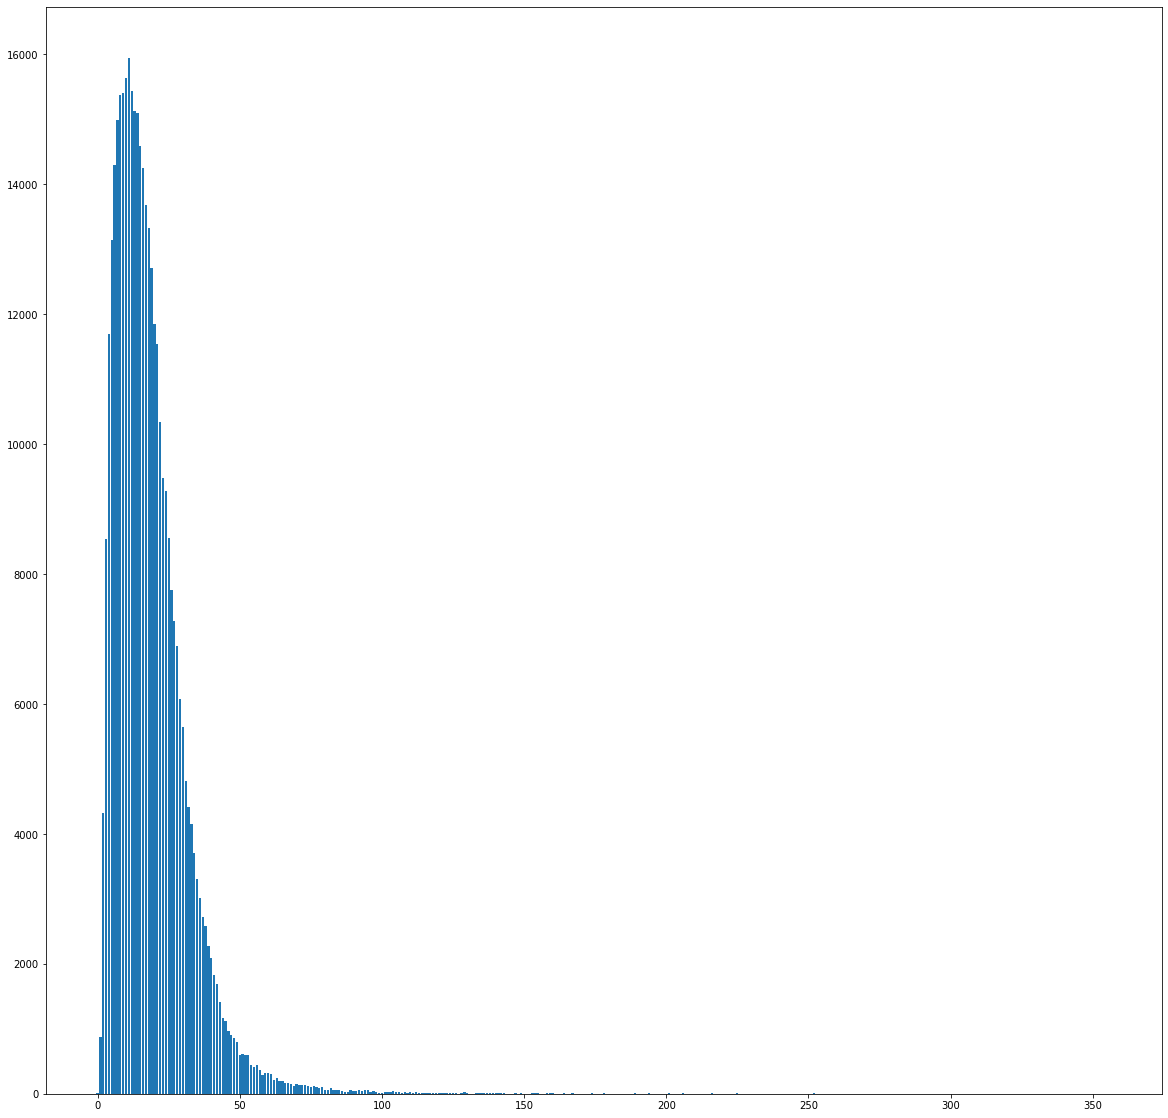

In [45]:
value_counts=en_vi_train['norm_premise_length'].value_counts()
dict_occurs=value_counts.to_dict()
x,y=list(dict_occurs.keys()),list(dict_occurs.values())
seq_len_visualizer(x,y),max(x)

Visualize en-vi hypothesis length distribution

(None, 97)

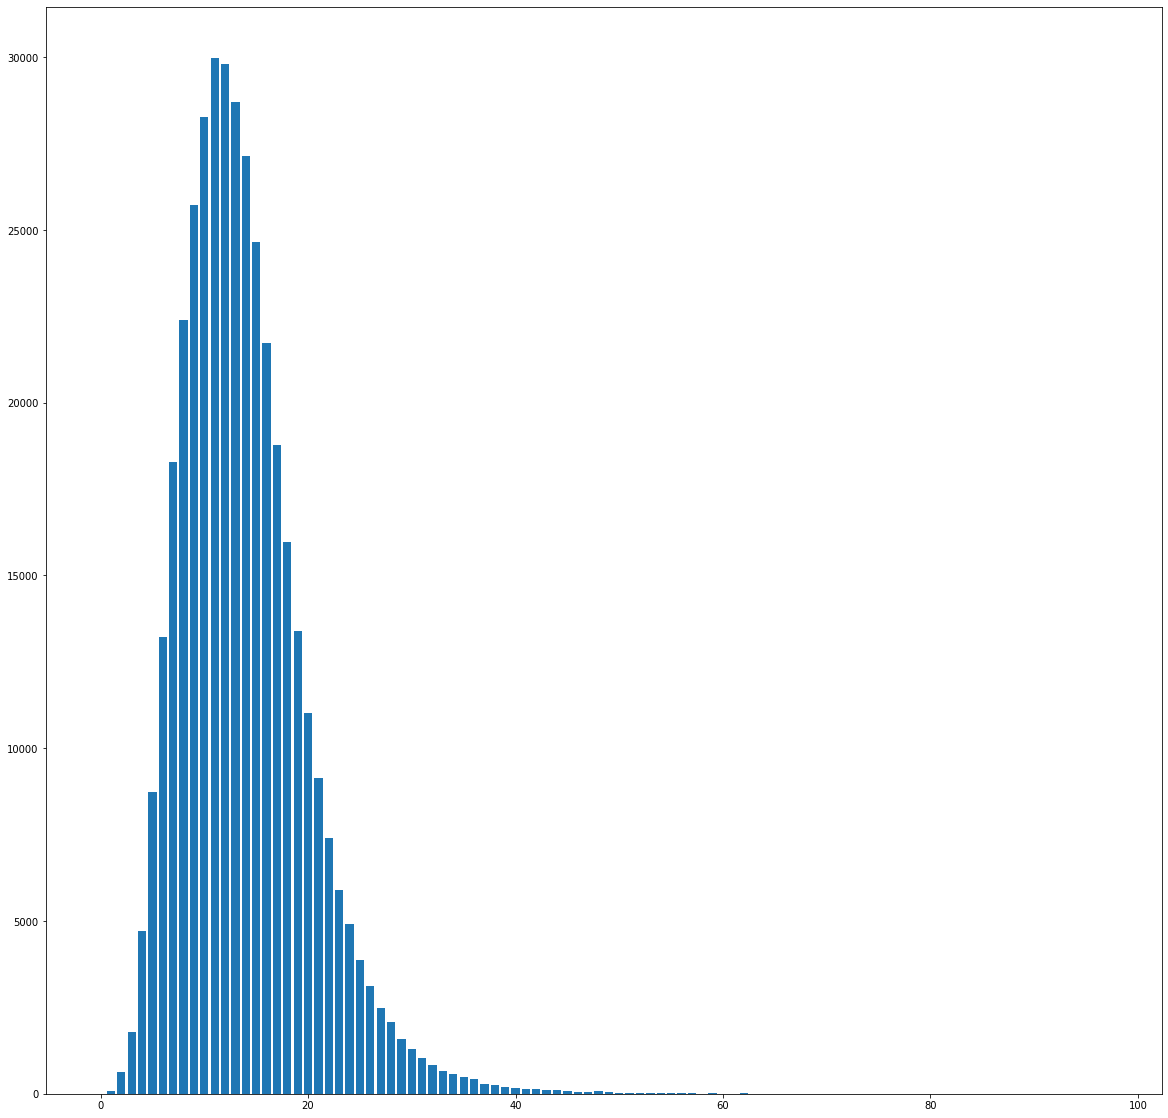

In [46]:
value_counts=en_vi_train['norm_hypothesis_length'].value_counts()
dict_occurs=value_counts.to_dict()
x,y=list(dict_occurs.keys()),list(dict_occurs.values())
seq_len_visualizer(x,y),max(x)

Visualize en-vi total length distribution


(None, 375)

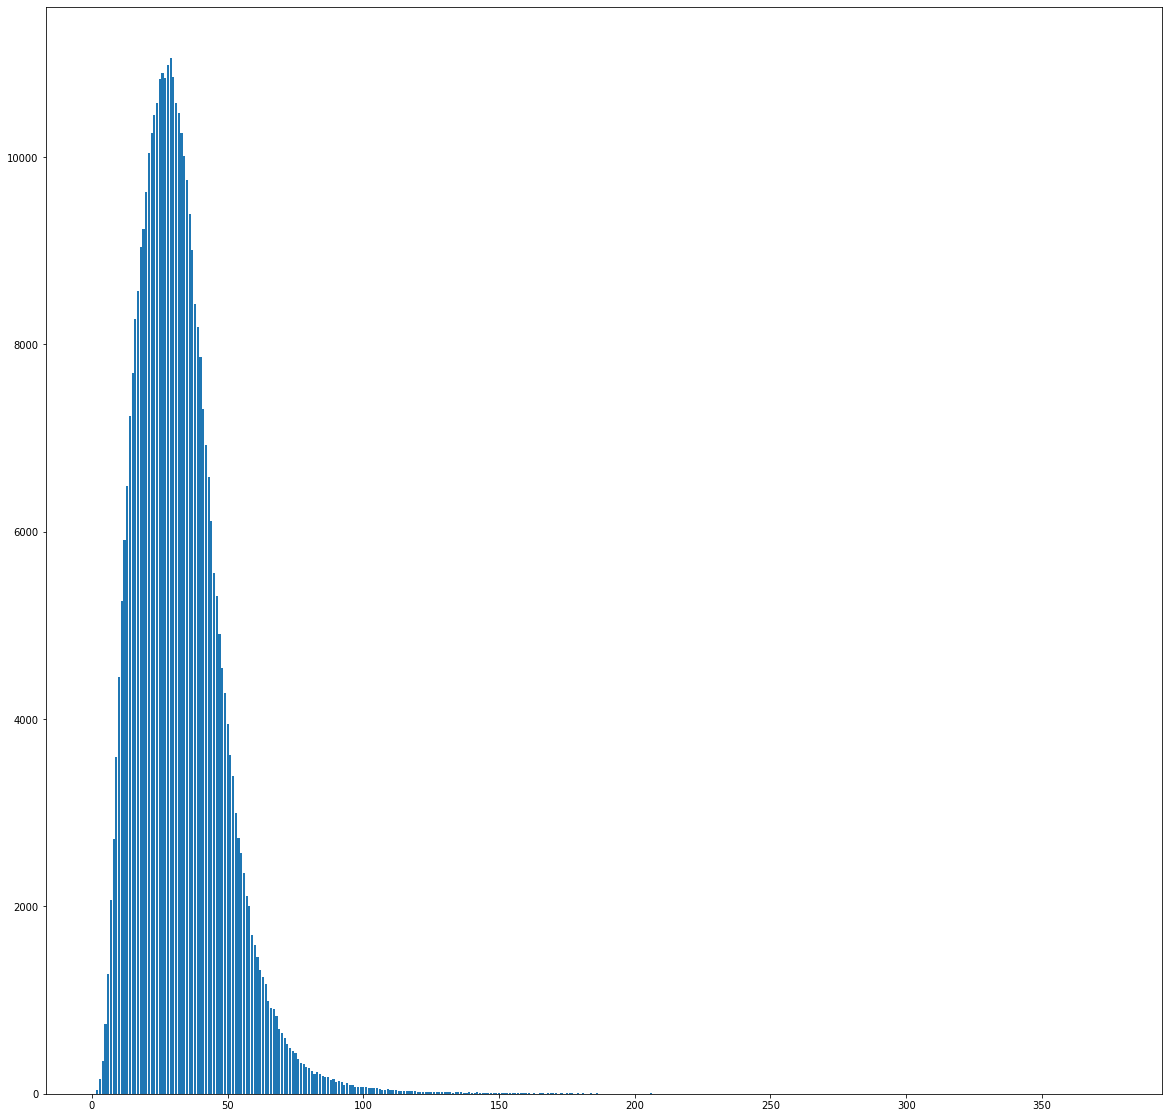

In [47]:
value_counts=en_vi_train['total_length'].value_counts()
dict_occurs=value_counts.to_dict()
x,y=list(dict_occurs.keys()),list(dict_occurs.values())
seq_len_visualizer(x,y),max(x)

Visualize vi-vi premise length distribution



(None, 440)

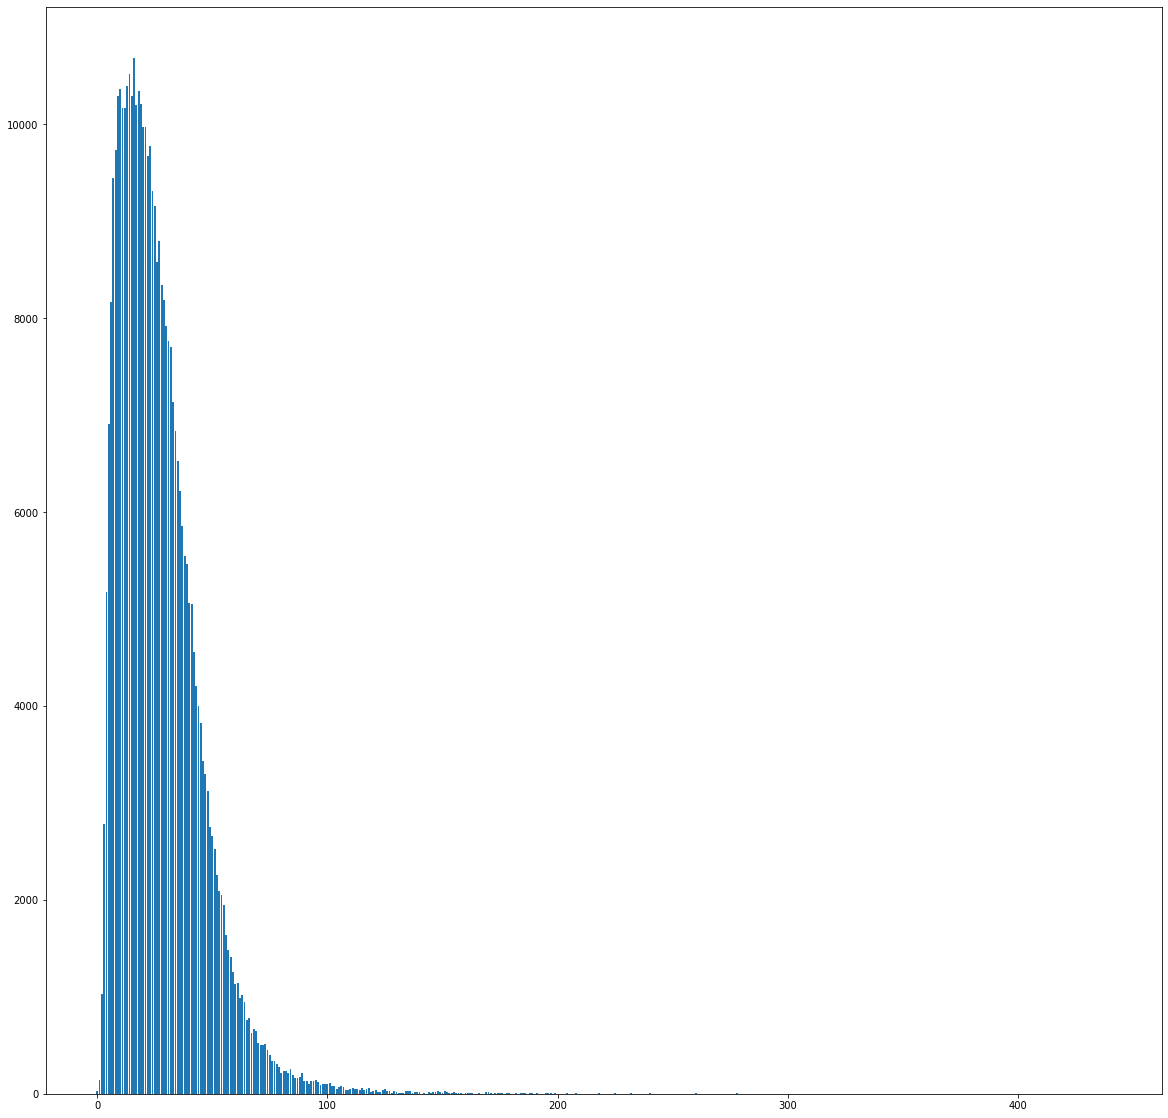

In [48]:
value_counts=vi_vi_train['norm_premise_length'].value_counts()
dict_occurs=value_counts.to_dict()
x,y=list(dict_occurs.keys()),list(dict_occurs.values())
seq_len_visualizer(x,y),max(x)

Visualize vi-vi hypothesis length distribution



(None, 97)

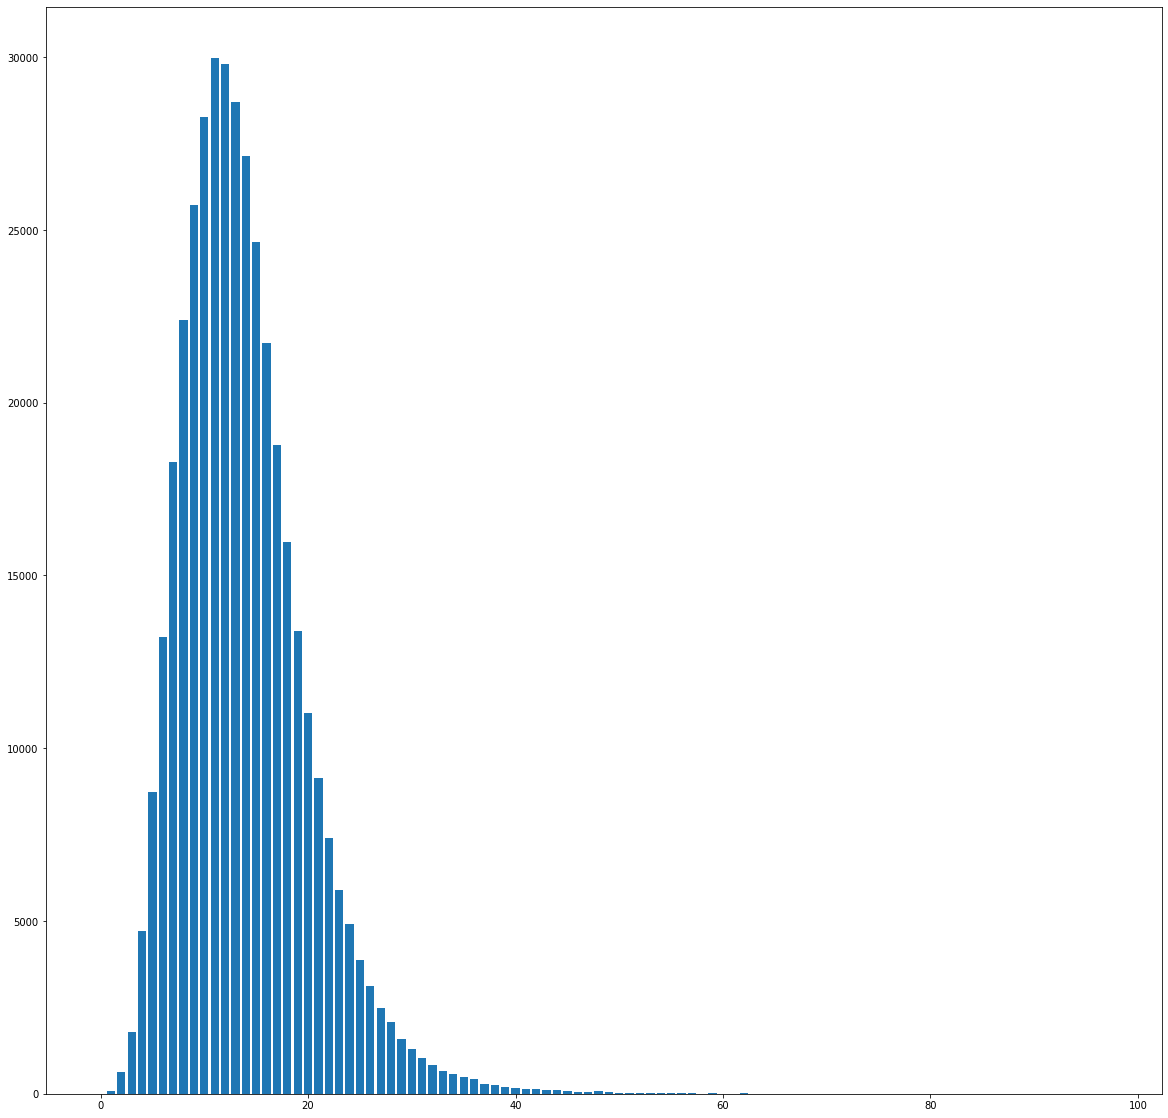

In [49]:
value_counts=vi_vi_train['norm_hypothesis_length'].value_counts()
dict_occurs=value_counts.to_dict()
x,y=list(dict_occurs.keys()),list(dict_occurs.values())
seq_len_visualizer(x,y),max(x)

Visualize vi-vi total length distribution



(None, 459)

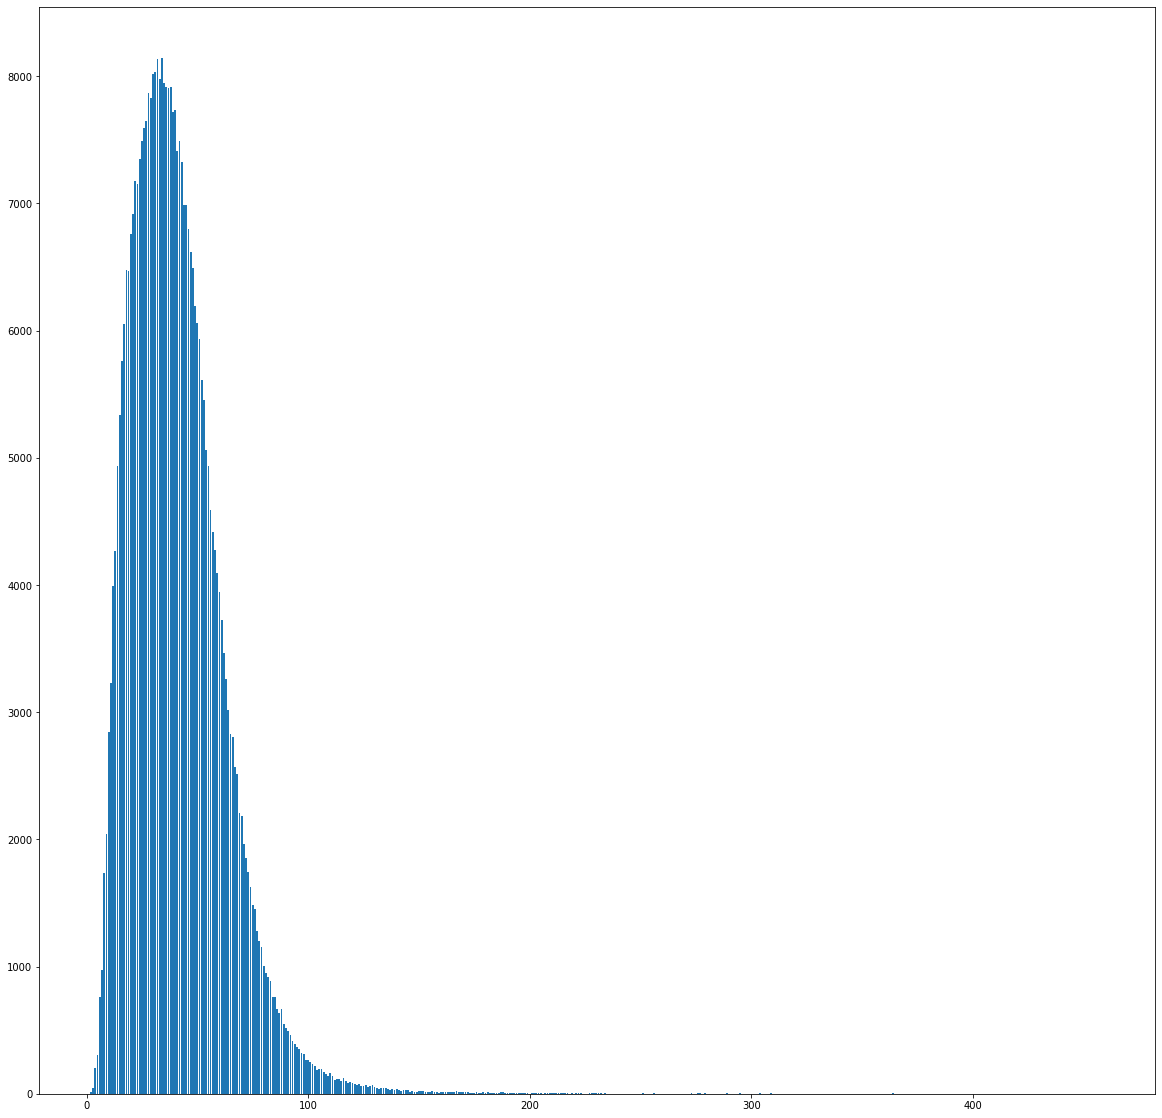

In [50]:
value_counts=vi_vi_train['total_length'].value_counts()
dict_occurs=value_counts.to_dict()
x,y=list(dict_occurs.keys()),list(dict_occurs.values())
seq_len_visualizer(x,y),max(x)

Note: if using all sentences en-vi and vi-vi -> max length is 128



In [51]:
pre_dataset_directory="/content/drive/MyDrive/en-vi-nli/pre_dataset"
os.makedirs(pre_dataset_directory,exist_ok=True)

In [52]:
os.makedirs(f'{pre_dataset_directory}/train',exist_ok=True)
en_vi_train.to_csv(f'{pre_dataset_directory}/train/en_vi.csv',index=False)
vi_vi_train.to_csv(f'{pre_dataset_directory}/train/vi_vi.csv',index=False)

because of the limitation GPU Tesla T4, I only get the sentences which have max length 60 from each set



In [53]:
en_vi_train=en_vi_train[en_vi_train['total_length']<=60]
vi_vi_train=vi_vi_train[vi_vi_train['total_length']<=60]

In [54]:
en_vi_train.to_csv(f'{pre_dataset_directory}/train/en_vi_60.csv',index=False)
vi_vi_train.to_csv(f'{pre_dataset_directory}/train/vi_vi_60.csv',index=False)

In [55]:
os.makedirs(f'{pre_dataset_directory}/valid',exist_ok=True)
en_vi_valid.to_csv(f'{pre_dataset_directory}/valid/en_vi.csv',index=False)
vi_vi_valid.to_csv(f'{pre_dataset_directory}/valid/vi_vi.csv',index=False)


#Create pre-dataset with 50k en-vi samples and 50k vi-vi samples


Although I only get sentences having max length is 60, the system still cant handle them -> I decide to get random 50k sentences from each train set



In [56]:
import pandas as pd


In [57]:
pre_dataset_directory="/content/drive/MyDrive/en-vi-nli/pre_dataset"

In [58]:
en_vi_train=pd.read_csv(f'{pre_dataset_directory}/train/en_vi_60.csv')
vi_vi_train=pd.read_csv(f'{pre_dataset_directory}/train/vi_vi_60.csv')

In [59]:
en_vi_valid=pd.read_csv(f'{pre_dataset_directory}/valid/en_vi.csv')
vi_vi_valid=pd.read_csv(f'{pre_dataset_directory}/valid/vi_vi.csv')

In [60]:
en_vi_train=en_vi_train[(en_vi_train['norm_premise_length']!=0)&(en_vi_train['norm_hypothesis_length']!=0)]
vi_vi_train=vi_vi_train[(vi_vi_train['norm_premise_length']!=0)&(vi_vi_train['norm_hypothesis_length']!=0)]


In [61]:
en_vi_train=en_vi_train.sample(n=50000)
vi_vi_train=vi_vi_train.sample(n=50000)

In [62]:
train=pd.concat([en_vi_train,vi_vi_train],axis=0)


In [63]:
train.value_counts(['label'])


label
2        33525
0        33317
1        33158
dtype: int64

In [64]:
train.to_csv(f'{pre_dataset_directory}/train/train_60_100k.csv',index=False)


In [65]:
valid=pd.concat([en_vi_valid,vi_vi_valid],axis=0)
valid.to_csv(f'{pre_dataset_directory}/valid/valid.csv',index=False)
